In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

Reading file with medical data

In [2]:
file = r"C:\Users\USER\Documents\DS12\my_project\cilmate\all_arb_cid_original.csv"
#cid_df = pd.read_csv(file)

In [3]:
import chardet
with open(file, 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

{'encoding': 'ISO-8859-1', 'confidence': 0.73, 'language': ''}

In [4]:
cid_df = pd.read_csv(file,encoding='ISO-8859-1')

In [5]:
pd.set_option('display.max_columns', None)
cid_df.head()

,Unnamed: 0,CLASSI_FIN,codigo_municipio_completo,COMUNINF,COPAISINF,COUFINF,CRITERIO,CS_ESCOL_N,CS_FLXRET,CS_GESTANT,CS_RACA,CS_SEXO,DOENCA_TRA,DT_ENCERRA,DT_INVEST,DT_NOTIFIC,DT_OBITO,DT_SIN_PRI,EVOLUCAO,FLXRECEBI,ID_AGRAVO,ID_MN_RESI,ID_MUNICIP,ID_PAIS,ID_REGIONA,ID_RG_RESI,mesorregiao_geografica,microrregiao_geografica,municipio,NDUPLIC_N,nome_mesorregiao,nome_microrregiao,nome_municipio,nome_uf,NU_ANO,NU_IDADE_N,SEM_NOT,SEM_PRI,SG_UF,SG_UF_NOT,TP_NOT,TPAUTOCTO,uf,X,X.1,tipo
0,1,1.0,3139409,NaN,NaN,NaN,1.0,9.0,0.0,5.0,3.0,F,2.0,25/01/2013,03/01/2013,03/01/2013,NaN,30/12/2012,1.0,NaN,A90,313940,313940,1,1454,1454,12,61,39409,NaN,Zona da Mata,Manhuaçu,Manhuaçu,Minas Gerais,2013,4016,201301,201301,31,31,2,NaN,31,2967,2967,deng
1,2,1.0,3139409,NaN,NaN,NaN,1.0,5.0,0.0,2.0,3.0,F,2.0,25/01/2013,03/01/2013,03/01/2013,NaN,30/12/2012,1.0,NaN,A90,313940,313940,1,1454,1454,12,61,39409,NaN,Zona da Mata,Manhuaçu,Manhuaçu,Minas Gerais,2013,4016,201301,201301,31,31,2,NaN,31,2969,2969,deng
2,3,5.0,3171303,NaN,NaN,NaN,1.0,6.0,0.0,5.0,1.0,F,NaN,28/01/2013,03/01/2013,03/01/2013,NaN,03/01/2013,1.0,NaN,A90,317130,317130,1,1458,1458,12,62,71303,NaN,Zona da Mata,Viçosa,Viçosa,Minas Gerais,2013,4070,201301,201301,31,31,2,NaN,31,12947,12947,deng
3,4,5.0,3136702,NaN,NaN,NaN,1.0,7.0,0.0,6.0,1.0,M,NaN,04/02/2013,05/01/2013,05/01/2013,NaN,02/01/2013,1.0,NaN,A90,313670,313670,1,1452,1452,12,65,36702,NaN,Zona da Mata,Juiz de Fora,Juiz de Fora,Minas Gerais,2013,4027,201301,201301,31,31,2,NaN,31,7730,7730,deng
4,5,5.0,3139409,NaN,NaN,NaN,1.0,9.0,0.0,5.0,9.0,F,NaN,25/01/2013,07/01/2013,07/01/2013,NaN,03/01/2013,1.0,NaN,A90,313940,313940,1,1454,1454,12,61,39409,NaN,Zona da Mata,Manhuaçu,Manhuaçu,Minas Gerais,2013,4012,201302,201301,31,31,2,NaN,31,8425,8425,deng


In [6]:
cid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67002 entries, 0 to 67001
Data columns (total 46 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 67002 non-null  int64  
 1   CLASSI_FIN                 66943 non-null  float64
 2   codigo_municipio_completo  67002 non-null  int64  
 3   COMUNINF                   22158 non-null  float64
 4   COPAISINF                  22333 non-null  float64
 5   COUFINF                    22175 non-null  float64
 6   CRITERIO                   32632 non-null  float64
 7   CS_ESCOL_N                 53847 non-null  float64
 8   CS_FLXRET                  66392 non-null  float64
 9   CS_GESTANT                 66983 non-null  float64
 10  CS_RACA                    61820 non-null  float64
 11  CS_SEXO                    67002 non-null  object 
 12  DOENCA_TRA                 15491 non-null  float64
 13  DT_ENCERRA                 66907 non-null  obj

In [7]:
cid_df["ID_AGRAVO"].unique()

array(['A90', 'A920', 'A928', 'A92.'], dtype=object)

<samp>Code meaning from CID 10<samp><br>  https://www.medicinanet.com.br/cid10/a.htm

A90 = Dengue
<br>
A920 = Chikungunya fever
 <br>
A928 = Other specified viral fevers transmitted by mosquitoes
 <br>
A92. = Other mosquito-borne viral fevers
 <br>

In final data keep only Dengue entries

In [8]:
cid_df["tipo"].unique()

array(['deng', 'chik', 'zika'], dtype=object)

In [9]:
cid_df["ID_MUNICIP"].unique()

array([313940, 317130, 313670, 314390, 311960], dtype=int64)

<samp>City code from IBGE<samp> <br>(https://www.ibge.gov.br/explica/codigos-dos-municipios.php)

<br>313940 = Manhuaçu
<br>317130 = Viçosa
<br>313670 = Juiz de Fora
<br>314390 = muriaé
<br>311960 = Coronel Pacheco
<br>===========================    

In [10]:
cid_df["NU_ANO"].unique()

array([2013, 2014, 2015, 2016, 2017, 2018, 2019], dtype=int64)

List of date columns:
- __DT_SIN_PRI__ Date of the first symptoms
- __DT_INVEST__  Date of initiation of the investigation of the case
- __DT_NOTIFIC__ Date of completion of notification form
- __DT_ENCERRA__ Closing date
- __SEM_NOT__  Epidemiological week the case was notified
- __SEM_PRI__ Epidemiological week of first symptoms/diagnosis
- __NU_ANO__ Year

###  Choosing only the relevent columns
City (name and code), Date of the first symptoms and type of disease (name and code)


In [11]:
col_list = ["ID_MUNICIP", "nome_municipio", "ID_AGRAVO", "tipo", "DT_SIN_PRI","DT_NOTIFIC", "SEM_PRI", "NU_ANO"]
med_df = cid_df[col_list].copy()

In [12]:
med_df.head(10)

,ID_MUNICIP,nome_municipio,ID_AGRAVO,tipo,DT_SIN_PRI,DT_NOTIFIC,SEM_PRI,NU_ANO
0,313940,Manhuaçu,A90,deng,30/12/2012,03/01/2013,201301,2013
1,313940,Manhuaçu,A90,deng,30/12/2012,03/01/2013,201301,2013
2,317130,Viçosa,A90,deng,03/01/2013,03/01/2013,201301,2013
3,313670,Juiz de Fora,A90,deng,02/01/2013,05/01/2013,201301,2013
4,313940,Manhuaçu,A90,deng,03/01/2013,07/01/2013,201301,2013
5,313670,Juiz de Fora,A90,deng,04/01/2013,07/01/2013,201301,2013
6,313940,Manhuaçu,A90,deng,05/01/2013,07/01/2013,201301,2013
7,313940,Manhuaçu,A90,deng,01/01/2013,07/01/2013,201301,2013
8,313940,Manhuaçu,A90,deng,02/01/2013,07/01/2013,201301,2013
9,317130,Viçosa,A90,deng,06/01/2013,09/01/2013,201302,2013


In [13]:
med_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67002 entries, 0 to 67001
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ID_MUNICIP      67002 non-null  int64 
 1   nome_municipio  67002 non-null  object
 2   ID_AGRAVO       67002 non-null  object
 3   tipo            67002 non-null  object
 4   DT_SIN_PRI      67002 non-null  object
 5   DT_NOTIFIC      67002 non-null  object
 6   SEM_PRI         67002 non-null  int64 
 7   NU_ANO          67002 non-null  int64 
dtypes: int64(3), object(5)
memory usage: 4.1+ MB


-----
Creating a new column of 'week of the year' using the same code I used on the climate data to avoid data inconsistencies.
<br> The date of first symptoms "SEM_PRI" is the date to consider when counting number of cases.  

In [14]:
med_df['Date'] = med_df["DT_SIN_PRI"]
med_df['Date'] = pd.to_datetime(med_df['Date'], dayfirst=True, infer_datetime_format=True)
med_df['year'] = med_df['Date'].dt.year
med_df["month"] = med_df['Date'].dt.month
med_df['week'] = med_df['Date'].dt.isocalendar().week



In [15]:
med_df['year'].unique()

array([2012, 2013, 2014, 1986, 1996, 1987, 2015, 2002, 1967, 1999, 2000,
       1997, 1978, 1991, 1951, 2004, 1972, 1977, 2011, 1968, 1990, 2016,
       2010, 2006, 1952, 1954, 1973, 1939, 1946, 1969, 2003, 1974, 1983,
       1975, 1992, 1966, 1965, 1980, 1970, 1982, 2007, 2017, 1962, 2018,
       2005, 1995, 2008, 1942, 1956, 1984, 2009, 2019], dtype=int64)

The new outliers (years before 2012) are probably typos or misunderstandings in filling out the form. In these cases the date of notification will be used instead.

In [16]:
# using the notification date to fix year outliers.

med_df['Notf_Date'] = med_df["DT_NOTIFIC"]
med_df["Notf_Date"] = pd.to_datetime(med_df['Notf_Date'], dayfirst=True, infer_datetime_format=True)

In [17]:
med_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67002 entries, 0 to 67001
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   ID_MUNICIP      67002 non-null  int64         
 1   nome_municipio  67002 non-null  object        
 2   ID_AGRAVO       67002 non-null  object        
 3   tipo            67002 non-null  object        
 4   DT_SIN_PRI      67002 non-null  object        
 5   DT_NOTIFIC      67002 non-null  object        
 6   SEM_PRI         67002 non-null  int64         
 7   NU_ANO          67002 non-null  int64         
 8   Date            67002 non-null  datetime64[ns]
 9   year            67002 non-null  int64         
 10  month           67002 non-null  int64         
 11  week            67002 non-null  UInt32        
 12  Notf_Date       67002 non-null  datetime64[ns]
dtypes: UInt32(1), datetime64[ns](2), int64(5), object(5)
memory usage: 6.5+ MB


In [18]:
# The difference between first symptoms and date of notification

med_df['date_diff'] = med_df['Notf_Date'] - med_df['Date']
med_df.head()

,ID_MUNICIP,nome_municipio,ID_AGRAVO,tipo,DT_SIN_PRI,DT_NOTIFIC,SEM_PRI,NU_ANO,Date,year,month,week,Notf_Date,date_diff
0,313940,Manhuaçu,A90,deng,30/12/2012,03/01/2013,201301,2013,2012-12-30,2012,12,52,2013-01-03,4 days
1,313940,Manhuaçu,A90,deng,30/12/2012,03/01/2013,201301,2013,2012-12-30,2012,12,52,2013-01-03,4 days
2,317130,Viçosa,A90,deng,03/01/2013,03/01/2013,201301,2013,2013-01-03,2013,1,1,2013-01-03,0 days
3,313670,Juiz de Fora,A90,deng,02/01/2013,05/01/2013,201301,2013,2013-01-02,2013,1,1,2013-01-05,3 days
4,313940,Manhuaçu,A90,deng,03/01/2013,07/01/2013,201301,2013,2013-01-03,2013,1,1,2013-01-07,4 days


In [19]:
med_df["date_diff"].describe()

count                          67002
mean      19 days 07:35:36.401898450
std      449 days 12:56:07.665945456
min                  0 days 00:00:00
25%                  1 days 00:00:00
50%                  3 days 00:00:00
75%                  6 days 00:00:00
max              27982 days 00:00:00
Name: date_diff, dtype: object

In [20]:
med_df["date_diff"] = med_df["date_diff"]/pd.Timedelta(days=1)

In [21]:
med_df["date_diff"].describe()

count    67002.000000
mean        19.316394
std        449.538978
min          0.000000
25%          1.000000
50%          3.000000
75%          6.000000
max      27982.000000
Name: date_diff, dtype: float64

<AxesSubplot:xlabel='date_diff'>

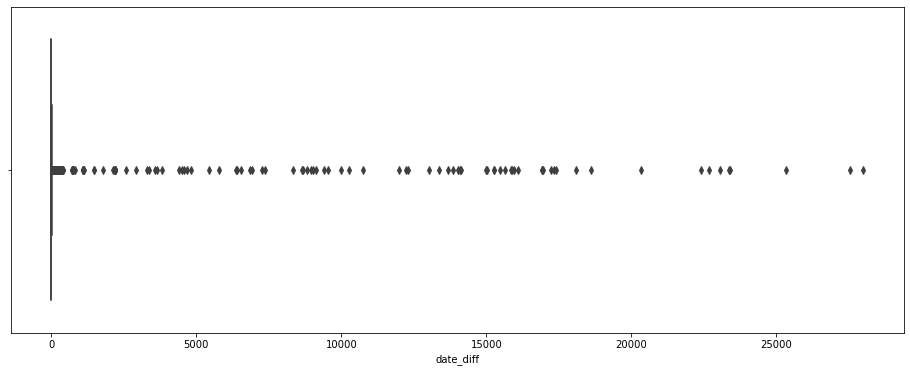

In [22]:
plt.figure(figsize=(16, 6))
sns.boxplot(x= "date_diff", data = med_df)

<AxesSubplot:xlabel='date_diff', ylabel='Count'>

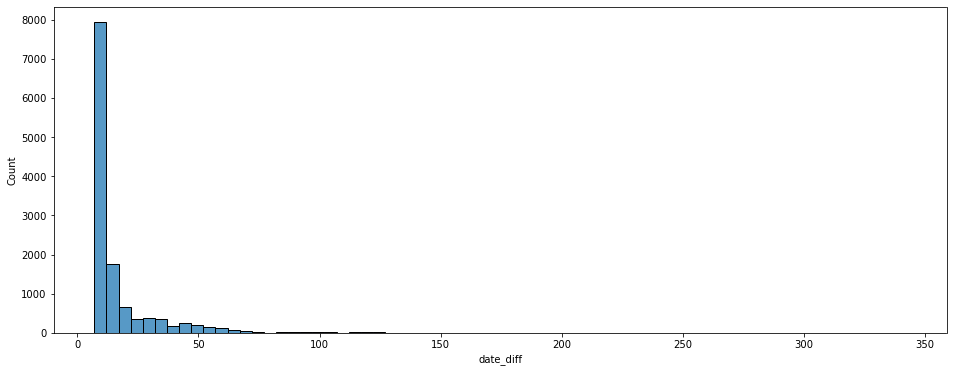

In [24]:
plt.figure(figsize=(16, 6))
sns.histplot(x= med_df.date_diff[(med_df.date_diff>6)& (med_df.date_diff<365)], data = med_df, binwidth=5 )

<AxesSubplot:xlabel='date_diff', ylabel='Count'>

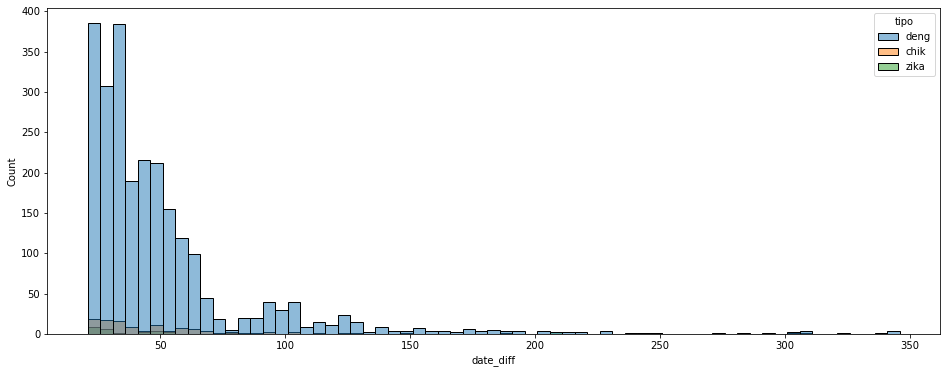

In [25]:
plt.figure(figsize=(16, 6))
sns.histplot(x= med_df.date_diff[(med_df.date_diff>20)& (med_df.date_diff<365)], data = med_df, binwidth=5, hue= 'tipo')

<AxesSubplot:xlabel='date_diff', ylabel='Count'>

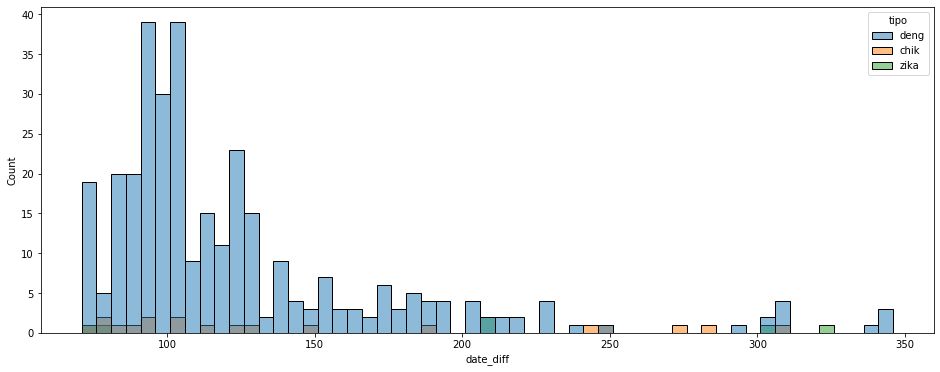

In [26]:
plt.figure(figsize=(16, 6))
sns.histplot(x= med_df.date_diff[(med_df.date_diff>70)& (med_df.date_diff<365)], data = med_df, binwidth=5, hue= 'tipo')

In [27]:
# If number of days between first symptoms and date of notification is bigger than 30 days - 
# then replace with the notification date.

med_df.loc[med_df['date_diff'] > 30 , 'Date'] = med_df['Notf_Date']

In [28]:
med_df['year'] = med_df['Date'].dt.year
med_df["month"] = med_df['Date'].dt.month
med_df['week'] = med_df['Date'].dt.isocalendar().week

med_df['year'].unique()

array([2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019], dtype=int64)

In [29]:
#fix problem of the number of last week of the year 

med_df.loc[(med_df['week'] == 1) & (med_df['month'] == 12), 'year'] = med_df['year'] +1
med_df.loc[(med_df['week'] >= 52) & (med_df['month'] == 1), 'year'] = med_df['year'] -1
med_df.tail(10)

,ID_MUNICIP,nome_municipio,ID_AGRAVO,tipo,DT_SIN_PRI,DT_NOTIFIC,SEM_PRI,NU_ANO,Date,year,month,week,Notf_Date,date_diff
66992,313670,Juiz de Fora,A928,zika,02/12/2019,03/12/2019,201949,2019,2019-12-02,2019,12,49,2019-12-03,1.0
66993,313670,Juiz de Fora,A92.,chik,20/11/2019,04/12/2019,201947,2019,2019-11-20,2019,11,47,2019-12-04,14.0
66994,313670,Juiz de Fora,A928,zika,20/11/2019,04/12/2019,201947,2019,2019-11-20,2019,11,47,2019-12-04,14.0
66995,313670,Juiz de Fora,A928,zika,06/12/2019,06/12/2019,201949,2019,2019-12-06,2019,12,49,2019-12-06,0.0
66996,313940,Manhuaçu,A92.,chik,11/11/2019,11/12/2019,201946,2019,2019-11-11,2019,11,46,2019-12-11,30.0
66997,313670,Juiz de Fora,A92.,chik,26/11/2019,13/12/2019,201948,2019,2019-11-26,2019,11,48,2019-12-13,17.0
66998,313670,Juiz de Fora,A92.,chik,10/08/2019,13/12/2019,201932,2019,2019-12-13,2019,12,50,2019-12-13,125.0
66999,313670,Juiz de Fora,A928,zika,26/11/2019,13/12/2019,201948,2019,2019-11-26,2019,11,48,2019-12-13,17.0
67000,313670,Juiz de Fora,A92.,chik,15/03/2019,23/12/2019,201911,2019,2019-12-23,2019,12,52,2019-12-23,283.0
67001,313670,Juiz de Fora,A92.,chik,05/09/2019,27/12/2019,201936,2019,2019-12-27,2019,12,52,2019-12-27,113.0


<AxesSubplot:xlabel='year', ylabel='count'>

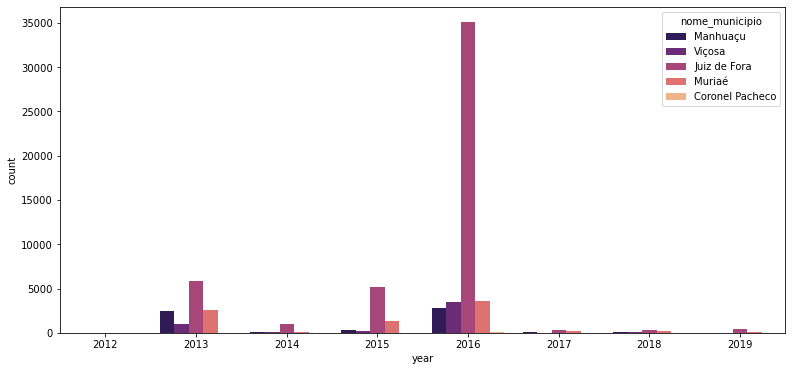

In [30]:
plt.figure(figsize=(13, 6))
sns.countplot(x= "year", hue = "nome_municipio", data = med_df, palette = 'magma')

In [31]:
# make column of 'week of the year' in format yyyyww

med_df['week'] = med_df['week'].astype('str').str.pad(width=2, side='left', fillchar='0')
med_df["weekofyear"] = med_df['year'].astype('str') +med_df['week'].astype('str')
med_df.tail(10)

,ID_MUNICIP,nome_municipio,ID_AGRAVO,tipo,DT_SIN_PRI,DT_NOTIFIC,SEM_PRI,NU_ANO,Date,year,month,week,Notf_Date,date_diff,weekofyear
66992,313670,Juiz de Fora,A928,zika,02/12/2019,03/12/2019,201949,2019,2019-12-02,2019,12,49,2019-12-03,1.0,201949
66993,313670,Juiz de Fora,A92.,chik,20/11/2019,04/12/2019,201947,2019,2019-11-20,2019,11,47,2019-12-04,14.0,201947
66994,313670,Juiz de Fora,A928,zika,20/11/2019,04/12/2019,201947,2019,2019-11-20,2019,11,47,2019-12-04,14.0,201947
66995,313670,Juiz de Fora,A928,zika,06/12/2019,06/12/2019,201949,2019,2019-12-06,2019,12,49,2019-12-06,0.0,201949
66996,313940,Manhuaçu,A92.,chik,11/11/2019,11/12/2019,201946,2019,2019-11-11,2019,11,46,2019-12-11,30.0,201946
66997,313670,Juiz de Fora,A92.,chik,26/11/2019,13/12/2019,201948,2019,2019-11-26,2019,11,48,2019-12-13,17.0,201948
66998,313670,Juiz de Fora,A92.,chik,10/08/2019,13/12/2019,201932,2019,2019-12-13,2019,12,50,2019-12-13,125.0,201950
66999,313670,Juiz de Fora,A928,zika,26/11/2019,13/12/2019,201948,2019,2019-11-26,2019,11,48,2019-12-13,17.0,201948
67000,313670,Juiz de Fora,A92.,chik,15/03/2019,23/12/2019,201911,2019,2019-12-23,2019,12,52,2019-12-23,283.0,201952
67001,313670,Juiz de Fora,A92.,chik,05/09/2019,27/12/2019,201936,2019,2019-12-27,2019,12,52,2019-12-27,113.0,201952


In [32]:
med_df.head(30)

,ID_MUNICIP,nome_municipio,ID_AGRAVO,tipo,DT_SIN_PRI,DT_NOTIFIC,SEM_PRI,NU_ANO,Date,year,month,week,Notf_Date,date_diff,weekofyear
0,313940,Manhuaçu,A90,deng,30/12/2012,03/01/2013,201301,2013,2012-12-30,2012,12,52,2013-01-03,4.0,201252
1,313940,Manhuaçu,A90,deng,30/12/2012,03/01/2013,201301,2013,2012-12-30,2012,12,52,2013-01-03,4.0,201252
2,317130,Viçosa,A90,deng,03/01/2013,03/01/2013,201301,2013,2013-01-03,2013,1,01,2013-01-03,0.0,201301
3,313670,Juiz de Fora,A90,deng,02/01/2013,05/01/2013,201301,2013,2013-01-02,2013,1,01,2013-01-05,3.0,201301
4,313940,Manhuaçu,A90,deng,03/01/2013,07/01/2013,201301,2013,2013-01-03,2013,1,01,2013-01-07,4.0,201301
5,313670,Juiz de Fora,A90,deng,04/01/2013,07/01/2013,201301,2013,2013-01-04,2013,1,01,2013-01-07,3.0,201301
6,313940,Manhuaçu,A90,deng,05/01/2013,07/01/2013,201301,2013,2013-01-05,2013,1,01,2013-01-07,2.0,201301
7,313940,Manhuaçu,A90,deng,01/01/2013,07/01/2013,201301,2013,2013-01-01,2013,1,01,2013-01-07,6.0,201301
8,313940,Manhuaçu,A90,deng,02/01/2013,07/01/2013,201301,2013,2013-01-02,2013,1,01,2013-01-07,5.0,201301
9,317130,Viçosa,A90,deng,06/01/2013,09/01/2013,201302,2013,2013-01-06,2013,1,01,2013-01-09,3.0,201301


<AxesSubplot:xlabel='year', ylabel='count'>

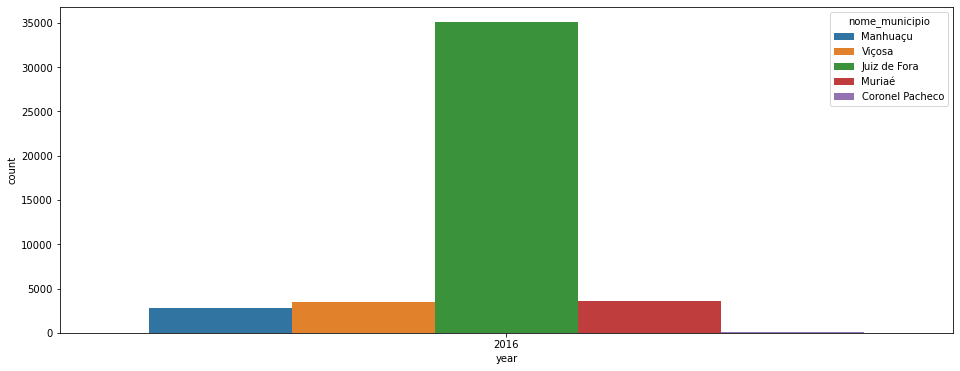

In [33]:
plt.figure(figsize=(16, 6))
sns.countplot(x= med_df.year[med_df.year == 2016], hue = "nome_municipio", data = med_df)

<AxesSubplot:xlabel='year', ylabel='count'>

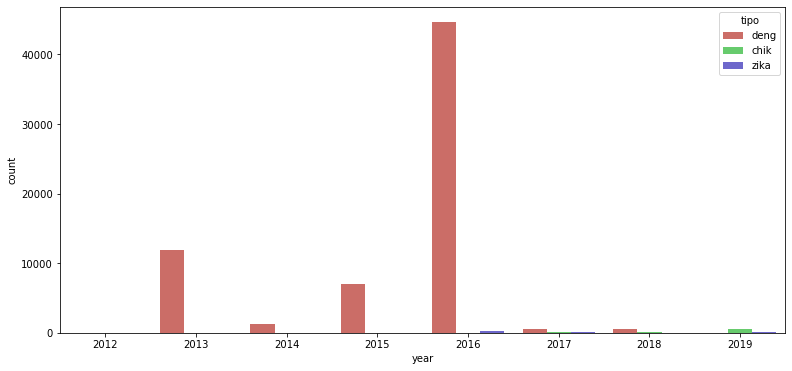

In [34]:
plt.figure(figsize=(13, 6))
sns.countplot(x= "year", hue = "tipo", data = med_df, palette = "hls")

In [35]:
med_df.to_csv("medical_data.csv")